## Logistic regression

In [4]:
import torch 
import torch.nn as nn
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

### Creating the dataset 


### We need to check here in the dataset instead of n_targets we will define n_classes.

In [9]:
df = make_classification(n_samples = 2000, n_features = 10, n_informative = 8, n_classes = 2, random_state = 1234)

### Now we will convert dataset in the torch 

In [14]:
type(df[1]), type(df[0])

(numpy.ndarray, numpy.ndarray)

In [18]:
X = torch.from_numpy(df[0]).float()
Y = torch.from_numpy(df[1])[..., None].float()

### Now we will define the model and if there is more than one layer then we will use the standerd way to define the mdodel in torch. The standert version has been shown in the below cell.

In [27]:
class Name(nn.Module):     # Name = model name (class name)
    def__init__(self, var1, var2):
        super(Name, self).__init__()
        ....
        # define layers
        ....
        
    def forward(self, x, y):
        
        ....
        
        ....
        
        return....
        

SyntaxError: invalid syntax (3015973807.py, line 2)

In [31]:
class LR(nn.Module):
    def __init__(self):
        super(LR, self).__init__()
        self.layer_1 = nn.Linear(10, 1)
        self.sig = nn.Sigmoid()
    def forward(self, x):
        out0 = self.layer_1(x)
        out1 = self.sig(out0)
        return out1
    
    

### Define the model and instanciate the class.

In [37]:
model = LR()

### As our data set has been ready now we will import the model, define loss function and train it using SGD

In [43]:
loss_fun = nn.BCELoss() # as we are using binary classification we will use binary class entropy loss.
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)


### Model training 

In [58]:
num_epochs = 10000
losses = []

for epoch in range(num_epochs):
    output = model(X)
    loss = loss_fun(output, Y)
    losses.append(loss.detach().numpy())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

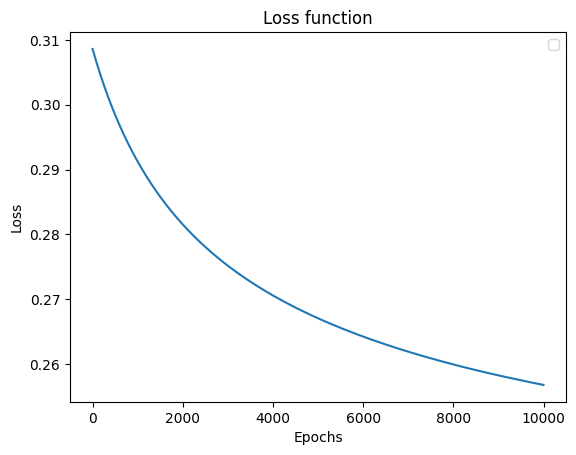

In [59]:
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss function")
plt.legend("Training")
plt.plot(losses)
plt.show()